# Survey Likert Scales

This notebooks visualizes the likert scales on IAQ awareness, perception and satisfaction.

* _Input:_ Clean .csv from Qualtrics with likert scales
* _Output:_ Plots graphs for each question, exports graphs as .jpg

**Tasks:** 
* Plots a distribution of awareness as vertical stacked bar chart
* Plots a distribution of perception as vertical stacked bar chart
* Plots a distribution of satisfaction as vertical stacked bar chart
* Plots a combination of the three as a horizontal stacked bar chart

## Metadata

* **Master**: Master Information Studies: Information Systems (track)
* **University**: University of Amsterdam (UvA)
* **Institute**: Informatics Institute
* **Faculty**: Faculty of Science (FNWI)
* **Research Group**: Digital Interactions Lab (DIL)
* **Student**: BSc Danny de Vries (14495643)
* **Supervisor**: Dr. H. (Hamed) Seiied Alavi PhD

[Viszlab](https://www.viszlab.github.io) © 2024 by [Danny de Vries](https://wwww.github.com/dandevri) is licensed under [CC BY-NC-SA 4.0](http://creativecommons.org/licenses/by-nc-sa/4.0/?ref=chooser-v1).

## Prequisites

This notebooks needs a sufficient Python version (>=3.6) to run and requires some packages and libraries for analysis and visualization. The following code checks if your installed Python version is compatible, installs the necessary packages and imports the packages into the notebook.

### Check Python installation

In [2]:
from packaging import version
import platform
import sys

min_version = '3.8'

def check_version(min_version):
    current_version = sys.version.split()[0]
    return version.parse(current_version) >= version.parse(min_version)

# Example usage:
if __name__ == "__main__":
    if check_version(min_version):
        print("Running a sufficiently new version of Python.")
        print("Current version: " + platform.python_version())
        print("Minimum required version: " + min_version)
    else:
        print("Python version is too old. Upgrade to a newer version.")

Running a sufficiently new version of Python.
Current version: 3.9.12
Minimum required version: 3.8


### Install the required packages

In [3]:
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install numpy

### Import the packages into the project

In [4]:
# External libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

### Load the clean csv

In [5]:
def import_csv(file):
    df = pd.read_csv(file)
    return df

file = 'survey-data/survey_data_clean.csv'

full_data = import_csv(file)
print(full_data)

                                            Location       Activity  \
0  On the first floor (1st floor - in a working s...   1 day a week   
1  On the first floor (1st floor - in a working s...  4 days a week   
2  On the first floor (1st floor - in a working s...  4 days a week   
3                   On the ground floor (the atrium)  2 days a week   
4  On the first floor (1st floor - in a working s...   1 day a week   
5                   On the ground floor (the atrium)  3 days a week   
6  On the second floor (2th floor - in a working ...  5 days a week   
7  On the second floor (2th floor - in a working ...  4 days a week   
8  On the first floor (1st floor - in a working s...   1 day a week   

         Occupancy Indoor Air Quality_1 Perceived_1  \
0      Not crowded              Neutral        Good   
1          Crowded           Very aware        Poor   
2  Not too crowded                Aware        Good   
3  Not too crowded              Unaware        Good   
4      Not cro

## Analysis of likert scales

### Awareness
**Q:** _Did you know that poor air quality have been identified to pose health risks and affect cognitive performance? How aware are you of the current air quality in this space?_

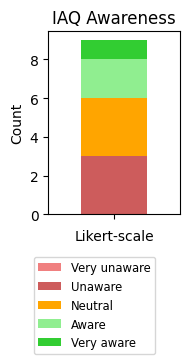

In [38]:
data = pd.read_csv(file)

def extract_awareness_answers(df):
    awareness_column = df['Indoor Air Quality_1']
    awareness_df = pd.DataFrame(awareness_column)
    return awareness_df

awareness_df = extract_awareness_answers(data)

# Count the occurrences of each category
likert_counts = awareness_df['Indoor Air Quality_1'].value_counts()

# Define the order of Likert categories
likert_order = ['Very unaware', 'Unaware', 'Neutral', 'Aware', 'Very aware']

# Sort the categories based on the defined order
likert_counts = likert_counts.reindex(likert_order)

# Create a DataFrame with zeros
likert_data = pd.DataFrame(0, index=[0], columns=likert_counts.index)

# Fill the DataFrame with counts
for category, count in likert_counts.items():
    likert_data[category] = count

# Plot a stacked bar chart with custom colors and adjusted width
fig, ax = plt.subplots(figsize=(2, 4))  # Adjust the width and height of the plot
likert_data.plot(kind='bar', stacked=True,
                 color=['lightcoral', 'indianred', 'orange', 'lightgreen', 'limegreen'], width=0.5, ax=ax)

# Add labels and title
ax.set_xlabel('Likert-scale')  # Empty string to remove x-axis label
ax.set_ylabel('Count')
ax.set_title('IAQ Awareness')

# Remove the 0 label from the x-axis
ax.set_xticklabels([])

# Add a legend
ax.legend(loc='upper left')

# Add a legend with specific position and font size
ax.legend(loc='upper center', bbox_to_anchor=(0.35, -0.2), fontsize='small')

# Adjust spacing around the plot
plt.margins(x=0.01)

# Show the plot
plt.tight_layout()  # Adjust layout to make it less wide
plt.show()


## Percieved

**Q:** _How do you perceive the air quality in the current space?_


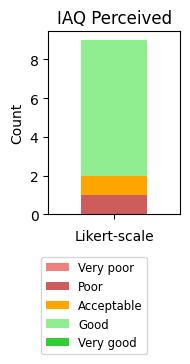

In [37]:
data = pd.read_csv(file)

def extract_Perceived_answers(df):
    Perceived_column = df['Perceived_1']
    Perceived_df = pd.DataFrame(Perceived_column)
    return Perceived_df

Perceived_df = extract_Perceived_answers(data)

# Count the occurrences of each category
likert_counts = Perceived_df['Perceived_1'].value_counts()

# Define the order of Likert categories
likert_order = ['Very poor', 'Poor', 'Acceptable', 'Good', 'Very good']

# Sort the categories based on the defined order
likert_counts = likert_counts.reindex(likert_order)

# Create a DataFrame with zeros
likert_data = pd.DataFrame(0, index=[0], columns=likert_counts.index)

# Fill the DataFrame with counts
for category, count in likert_counts.items():
    likert_data[category] = count

# Plot a stacked bar chart with custom colors and adjusted width
fig, ax = plt.subplots(figsize=(2, 4))  # Adjust the width and height of the plot
likert_data.plot(kind='bar', stacked=True,
                 color=['lightcoral', 'indianred', 'orange', 'lightgreen', 'limegreen'], width=0.5, ax=ax)

# Add labels and title
ax.set_xlabel('Likert-scale')  # Empty string to remove x-axis label
ax.set_ylabel('Count')
ax.set_title('IAQ Perceived')

# Remove the 0 label from the x-axis
ax.set_xticklabels([])

# Add a legend
ax.legend(loc='upper left')

# Add a legend with specific position and font size
ax.legend(loc='upper center', bbox_to_anchor=(0.35, -0.2), fontsize='small')

# Adjust spacing around the plot
plt.margins(x=0.01)

# Show the plot
plt.tight_layout()  # Adjust layout to make it less wide
plt.show()


## Satisfaction

**Q:** _How satisfied are you with the air quality in the current space?_


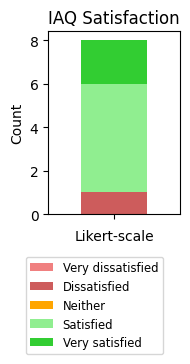

In [36]:
data = pd.read_csv(file)

# Function to extract answers from dataframes
def extract_answers(df, column_name, order):
    answers_column = df[column_name]
    answers_df = pd.DataFrame(answers_column)
    likert_counts = answers_df[column_name].value_counts().reindex(order, fill_value=0)
    return likert_counts

# Define Likert categories and order
satisfaction_order = ['Very dissatisfied', 'Dissatisfied', 'Neither', 'Satisfied', 'Very satisfied']

# Extract satisfaction answers
Satisfaction_df = data['Satisfaction_1']

# Count the occurrences of each category
likert_counts = Satisfaction_df.value_counts()

# Define the order of Likert categories
likert_counts = likert_counts.reindex(satisfaction_order)

# Create a DataFrame with zeros
likert_data = pd.DataFrame(0, index=[0], columns=likert_counts.index)

# Fill the DataFrame with counts
for category, count in likert_counts.items():
    likert_data[category] = count

# Plot a stacked bar chart with custom colors and adjusted width
fig, ax = plt.subplots(figsize=(2, 4))  # Adjust the width and height of the plot
likert_data.plot(kind='bar', stacked=True,
                 color=['lightcoral', 'indianred', 'orange', 'lightgreen', 'limegreen'], width=0.5, ax=ax)

# Add labels and title
ax.set_xlabel('Likert-scale')  # Empty string to remove x-axis label
ax.set_ylabel('Count')
ax.set_title('IAQ Satisfaction')

# Remove the 0 label from the x-axis
ax.set_xticklabels([])

# Add a legend with specific position and font size
ax.legend(loc='upper center', bbox_to_anchor=(0.35, -0.2), fontsize='small')

# Adjust spacing around the plot
plt.margins(x=0.01)

# Show the plot
plt.tight_layout()  # Adjust layout to make it less wide
plt.show()